# How to improve your chances of getting a Mortgage Loan

# Context

* This is a publicly available dataset that contains information about Mortgage loan.
* The Home Mortgage Disclosure Act (HMDA) requires many financial institutions to maintain, report, and publicly disclose information about mortgages. These public data are important because they help show whether lenders are serving the housing needs of their communities; or help authourities to determine and fish out all predatory act of lending; they give public officials information that helps them make decisions and policies; and they shed light on lending patterns that could be discriminatory.  
* Eg. a reported increase in mortgage borrowing by blacks and Hispanics as of 1993.

## Project Goal
Discovering the main factors affecting applicants mortgage loan approval rate using python

# content
This project consist typically of exploratory Data Analysis.  
All the technical steps have been explained with comments

# 1.0.0) EXPLORATORY DATA ANALYSIS SECTION

We will start off by importing various libraries for our analysis.
The css code below will create border lines around our dataframes

In [2]:
%%HTML
<style type='text/css'>
table.dataframe td,table.dataframe th{
    border: 1px solid black !important;
    color: solid black !important
}
</style>


In [3]:
# create a class to print different font properties in python
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
# Importing various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import string
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [5]:
# Load the dataset from a directory on local machine
df_main = pd.read_csv('Washington_State_HDMA.csv',low_memory=False)


**1.0.1)**
### An Overview
* The shape of the data is (466565,47) which means it contains 466,566 unique data entries and 47 attribute/features/columns.
* Dataset has 34 features with object datatype, 9 with float datatype and 4 with integer datatype.

In [6]:
# Get the dataset information
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466566 entries, 0 to 466565
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tract_to_msamd_income           465951 non-null  float64
 1   rate_spread                     8638 non-null    float64
 2   population                      465956 non-null  float64
 3   minority_population             465956 non-null  float64
 4   number_of_owner_occupied_units  465944 non-null  float64
 5   number_of_1_to_4_family_units   465955 non-null  float64
 6   loan_amount_000s                466566 non-null  int64  
 7   hud_median_family_income        465960 non-null  float64
 8   applicant_income_000s           404533 non-null  float64
 9   state_name                      466566 non-null  object 
 10  state_abbr                      466566 non-null  object 
 11  sequence_number                 466566 non-null  int64  
 12  respondent_id   

### 1.0.2) This is the overall description of some numerical features of the dataset

>`Loan amount`: Is the amount of money the applicant applied for.  
>`as_of_year`: Is the the reporting year of the HMDA record.

* The Average loan amount received by applicants is `$`$298.26k$ and the average income of applicants is `$`$112.98k$ which is slightly lower than the loan receives by applicants.  

* The minimum loan amount received by applicants is `$`$1k$ USD(United States Dollars) which is proportional to the minimum annual gross income of applicants thus `$`$1k$.
* The median `tract_to_msamd_income`(The percentage of the median family income for the tract compared to the median family income for the MSA/MD) is `$`$104.530k$.  
> * **Tract or Census Tract:** Is a noughborhood consisting of a population between 2,800 and 8,000.  
> * **Metropolitan statistical areas (MSA):** are delineated by the U.S. Office of Management and Budget (OMB) as having at least one urbanized area with a minimum population of 50,000.  
* The minimum,average and maximum interest `rate_spread` is 1.50, 1.72 and 13.66 respectively.
>The interest rate spread is what the company charges on a loan compared to its cost of money.
* The average `hud_median_family_income` is `$`$76797.148$ 
> * hud_median_family_income is median family income in dollars for the MSA/MD in which the tract is located.
* `as_of_year` is the year the HDMA data was given to the federal agency.

In [7]:
# show data decription
df_main.describe()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,sequence_number,census_tract_number,as_of_year,application_date_indicator
count,465951.000000,8638.000000,465956.000000,465956.000000,465944.00000,465955.000000,466566.000000,465960.000000,404533.000000,4.665660e+05,465960.000000,466566.0,466566.000000
mean,106.906157,2.120028,5288.219117,24.765475,1389.05978,1822.137288,298.260936,76797.148468,112.984713,1.126340e+05,1395.489104,2016.0,0.207285
std,29.280418,1.113000,1665.350069,15.214602,506.75606,682.031693,760.741532,12959.051933,125.115972,2.020830e+05,2950.970895,0.0,0.609593
min,14.050000,1.500000,5.000000,2.040000,10.00000,10.000000,1.000000,48700.000000,1.000000,1.000000e+00,1.000000,2016.0,0.000000
25%,87.260002,1.590000,4124.000000,13.220000,1032.00000,1395.000000,172.000000,65800.000000,60.000000,5.121000e+03,117.010000,2016.0,0.000000
50%,104.529999,1.720000,5173.000000,20.750000,1359.00000,1734.000000,248.000000,73300.000000,89.000000,2.647200e+04,323.220000,2016.0,0.000000
75%,123.809998,2.000000,6342.000000,32.220001,1705.00000,2171.000000,350.000000,90300.000000,133.000000,1.095258e+05,702.030000,2016.0,0.000000
max,257.140015,13.660000,13025.000000,94.790001,2997.00000,5893.000000,99999.000000,90300.000000,9999.000000,1.241780e+06,9901.000000,2016.0,2.000000


### 1.0.3) Describing the non-numerical features

* Most of the mortgage applicants are male representing $60.76$% and female of $23.61$%. The remaining $15.63$% applicants didn't provide their gender status.
* All the properties are located in the Washington state from which this entire Mortgage data was collected.
* The `loan_type_name` provide information of the institutions or individuals that guaranteed the loan:Government programs offered by Federal Housing Administration (FHA), the Department of Veterans Affairs (VA), or the Department of Agriculture's Rural Housing Service (RHS) or Farm Service Agency (FSA). All other loans are classified as conventional. For this data, most loans were guaranted Convetionally representing %$71.30$ and the rest %$29.70$.
* In the loan process %$99.997$ percent of it was not subjected to the Home Ownership and Equity Protection Act(HOEPA).
    > **The Home Ownership and Equity Protection Act** is a federal law that discourages banks and other financial institutions from predatory lending when they fund mortgages and home equity loans.
    
* Per this data set, the top-most reasons of being denied of loan is because of `Debt_to_income ratio`.

In [8]:
# display only object datatype
df_main.describe(include='O').iloc[:,20:]

,co_applicant_race_name_3,co_applicant_race_name_2,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
count,105,1862,466566,466566,466566,46,68,297,4478,466566,466566,466566,466566,466566
unique,3,5,8,5,4,4,5,5,5,7,4,6,6,8
top,White,White,No co-applicant,No co-applicant,Male,White,Native Hawaiian or Other Pacific Islander,White,White,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
freq,75,1403,211725,211725,283475,42,43,204,3401,314812,350149,238716,238716,263712


In [9]:
# know how the data features correlate with each other
df_corr = df_main.corr().abs().unstack().sort_values(ascending=False)
df_corr = df_corr.reset_index() 

df_corr.columns = ['feat_one','feat_two','count']
# slice and jump one step at times
df_corr = df_corr[df_corr['count'] != 1.0][1::2]
# get features with correlation of more than 0.3
df_corr[df_corr['count'] > 0.3]

,feat_one,feat_two,count
13,number_of_owner_occupied_units,number_of_1_to_4_family_units,0.853762
15,population,number_of_owner_occupied_units,0.767629
17,population,number_of_1_to_4_family_units,0.726803
19,census_tract_number,hud_median_family_income,0.457330
21,minority_population,tract_to_msamd_income,0.424554
23,tract_to_msamd_income,number_of_owner_occupied_units,0.385813


### 1.0.4) Understanding our label `action_taken_name`
Loan origination is the process by which a borrower applies for a new loan, and a lender processes that application. This process ends when the loan is approved or denied. In this case `loan originated` means the loan has been approved for disbursement in our case.

what is `loan purchased by institution`: Most lenders sell loans to **Secondary market** due to liquidity reasons, meaning they either don’t want the loans in their balance sheet or they sell loans so they can lend to more borrowers.

**Secondary Market** is basically an institution willing to buy loans from the primary lenders. When this happens, either the secondary market will resume the service right(means consumers have to make payment to the secondary market) or the service right is retained by the original lender.

**NB:** In our case, we will remove all loans that were sold to secondary institutions since we want to deal directly to primary lenders.  
We will also take-out loans that were withdrawn by applicants `Application withdrawn by applicant`.

In [10]:
print(df_main['action_taken_name'].unique())

df_main = df_main[(df_main['action_taken_name'] != 'Loan purchased by the institution') &\
                  (df_main['action_taken_name'] != 'Application withdrawn by applicant')]

['Loan originated' 'Application approved but not accepted'
 'Application denied by financial institution'
 'Application withdrawn by applicant' 'File closed for incompleteness'
 'Loan purchased by the institution'
 'Preapproval request denied by financial institution'
 'Preapproval request approved but not accepted']


In [11]:
df_main['action_taken_name'].unique()

array(['Loan originated', 'Application approved but not accepted',
       'Application denied by financial institution',
       'File closed for incompleteness',
       'Preapproval request denied by financial institution',
       'Preapproval request approved but not accepted'], dtype=object)

_We will also drop some selected columns that have too much missing values and are not really of much importance to this project._

### 1.0.5) What is the main reason why applicants loans are denied.

* The `denial_reason_name_1`,`denial_reason_name_2` and `denial_reason_name_3` columns contain the various reason why an applicant loan application is denied. Each applicant has atmost three reasons to be denied of a loan.  
> **NB:**There is a huge number of missing data: a total of **42491** out of **1031065** is missing accross the three columns. Decision about it would be made a the Feature engineering section.
* Since we want the overall reasons that cuts accross all the three columns,the three features would be joined together into one column.
* After that we find the percentage of each reason compared to the others.  


  
* From the graph below, the significant reason why applicants are denied of loans is `Debt-to-income` ratio and bad `Credit History` having $23$% and $22$% respectively.
 > The debt-to-income ratio is the percentage of your gross monthly income that goes to paying your monthly debt payments.
 Most lenders don't want it to be above 36%.
 
 > Credit history is a record of a consumer's ability to repay debts and demonstrated responsibility in repaying debts.
 
* The most avoidable one is the incomplete loan application. A number of $6,184$ representing $1.73$ `%` of the total loan applications were denied because of incompleted application.

In [12]:
print(df_main[['denial_reason_name_1',
               'denial_reason_name_2',
               'denial_reason_name_3']].isna().sum(),'\n\n')

print('Total available values = {}'.format(df_main[['denial_reason_name_1',
                                                    'denial_reason_name_2',
                                                    'denial_reason_name_3']].notna().sum().sum()))

print('Total missing values = {}'.format(df_main[['denial_reason_name_1',
                                                  'denial_reason_name_2',
                                                  'denial_reason_name_3']].isna().sum().sum()))


denial_reason_name_1    323353
denial_reason_name_2    351106
denial_reason_name_3    356606
dtype: int64 


Total available values = 42491
Total missing values = 1031065


In [13]:
# select only the three denial reasons from the dataset
df_loan_denial = df_main[['denial_reason_name_1','denial_reason_name_2','denial_reason_name_3']]
# compute the percentage of denials

df_loan_denial = pd.DataFrame(pd.concat([df_loan_denial['denial_reason_name_1'],
                                         df_loan_denial['denial_reason_name_2'],
                                         df_loan_denial['denial_reason_name_3']],
                                         ignore_index=True).value_counts(normalize=True),
                                         columns=['denial_reason_count'])

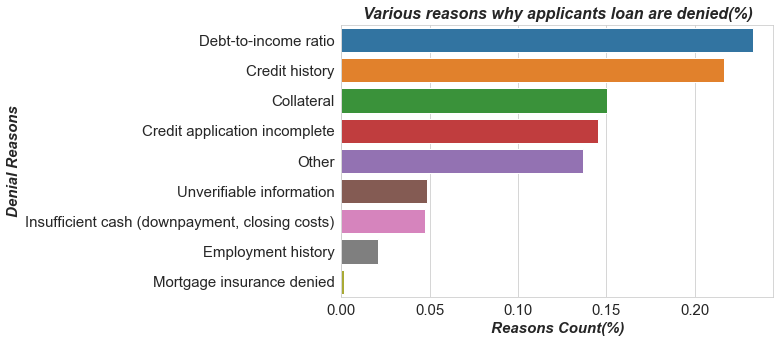

In [14]:
# Declare a matplotlib figure and plot the denial reasons
fig,ax  = plt.subplots(figsize=(10,5))

sns.barplot(y=df_loan_denial.index,x=df_loan_denial.denial_reason_count,orient='h');

plt.ylabel('Denial Reasons',fontdict={'fontsize':15,'fontstyle':'italic','fontweight':'bold'})

plt.xlabel('Reasons Count(%)',fontdict={'fontsize':15,'fontstyle':'italic','fontweight':'bold'})

plt.tick_params(axis='both',labelsize=15)

plt.subplots_adjust(left=0.3)

plt.title('Various reasons why applicants loan are denied(%)',
          fontdict={'fontsize':16,'fontstyle':'italic','fontweight':'bold'});
plt.savefig('denial_reasons',bbox_inches="tight")

### 1.0.6) Does applicants gross income play role in his/her loan attainment?

In figure **1.0.5,** it shows clearly that debt-to-income ratio is the main reason why applicants are denied of loans.
This brings up the question, is  high income applicants having an edge over the lower income groups?
This turned out be true!.

We will create a new column called `loan_approved` which will consist of binary, `1` means loan was approved and `0` means denied. The we will divide the entire dataset into two groups of dataframes `loan_approved` and `loan_denied` and then print out the mean and median income of both categories.

* The bar plot shows that the mean and median income of those with their loans approved is slightly higher than those with their loans denied.

In [15]:
# creating loan_approved column from the column 'action_taken_name' columns
df_main['loan_approved'] = df_main['action_taken_name'].apply(lambda x: 1 if x == 'Loan originated' else 0)
# loan_approved = 1 and loan_denied = 0
loan_approved,loan_denied = df_main[df_main['loan_approved'] == 1],df_main[df_main['loan_approved'] == 0]

print('Approved mean {} and median {}'.format(loan_approved['applicant_income_000s'].mean(),
                                              loan_approved['applicant_income_000s'].median()))

print('Denied mean {} and median {}'.format(loan_denied['applicant_income_000s'].mean(),
                                            loan_denied['applicant_income_000s'].median()))

Approved mean 116.65957623218928 and median 93.0
Denied mean 102.43835552167029 and median 77.0


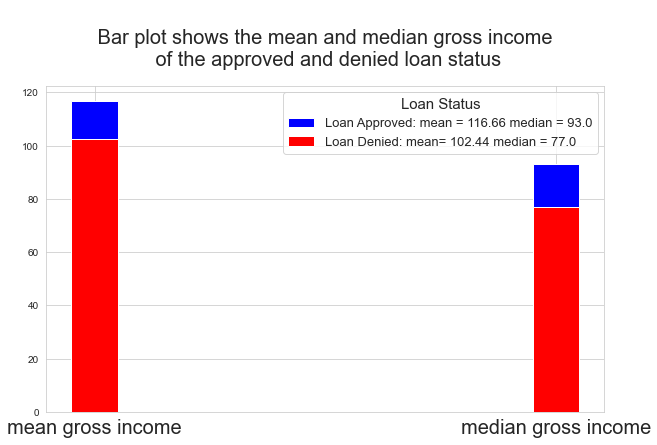

In [16]:
# Find the mean and median of applicants gross income
app_loan_mean,app_loan_med = loan_approved['applicant_income_000s'].mean(),loan_approved['applicant_income_000s'].median()
den_loan_mean,den_loan_med = loan_denied['applicant_income_000s'].mean(),loan_denied['applicant_income_000s'].median()

# Plot the results
fig,ax = plt.subplots(1,1,sharey=True,figsize=(10,6))
ax.bar(x=['mean gross income','median gross income'],height=(app_loan_mean,app_loan_med),color='b',alpha=1,width=0.1)
ax.bar(x=['mean gross income','median gross income'],height=(den_loan_mean,den_loan_med),color='red',width=0.1)

plt.legend(['Loan Approved: mean = {} median = {}'.format(np.round(app_loan_mean,2),app_loan_med),
            'Loan Denied: mean= {} median = {}'.format(np.round(den_loan_mean,2),den_loan_med)],
           fontsize=13,title='Loan Status',title_fontsize=15)

ax.tick_params(axis='x',labelsize=20)
plt.title(' \n Bar plot shows the mean and median gross income \n of the approved and denied loan status',fontsize=20,pad=20);

# save the plot onto memory
plt.savefig('gross_income',bbox_inches="tight")

### 1.0.7) Can a Low or High neighborhood family income of where the property is located affect applicants chances of getting a loan

* From the HMDA dataset, lenders disclose the census tract of applicants instead of making their addressess public, which is part of the community where the property is located.

* Each census tract is located in a Metropolitian Statistical Area/Metropolitian Division (MSA/MD). 
*The `hud_median_family_income` is the median family income in dollars for the MSA/MD in which the tract is located.

* Basically,you must be expecting that for a loan to be approved the applicant's income must be quite similar or above the neighbourhood median family income.  

* well, this is in some sense true! but wait,we will see how applicants with their average income GREATER OR LESS than the mean neighborhood median income of where the property is located are affected.


In [17]:
# Lets take away the null values from the applicant_income and msamd_name
df_hud_appincome = df_main[df_main['applicant_income_000s'].notna()]
df_hud_appincome = df_hud_appincome[df_main['msamd_name'].notna()]

#The trailing zeros in the column name indicates that the actual 
# amount must be multiplied by 1000 to get the actual values
df_hud_appincome['applicant_income_000s'] = df_hud_appincome['applicant_income_000s']*1000

# Form a dictionary of neighborhood name and its corresponding average median income
msamd_name_mean = dict(df_hud_appincome.groupby('msamd_name').mean()['hud_median_family_income'])

In [18]:
series_list = []

for name,val in msamd_name_mean.items():
    df = df_hud_appincome[df_hud_appincome['msamd_name'] == name]

    greater = df[df['applicant_income_000s'] > val]
    greater['mean_status'] = 'greater'
    series_list.append(greater['mean_status'])
    
    equal = df[df['applicant_income_000s'] == val]
    equal['mean_status'] = 'equal'
    series_list.append(equal['mean_status'])

    less = df[df['applicant_income_000s'] < val]
    less['mean_status'] = 'lesser'
    series_list.append(less['mean_status'])
    
# concatenate the list of series and add it to the dataframe
df_transformed = pd.concat(series_list)
combined = pd.concat([df_hud_appincome,df_transformed],axis=1)

In [21]:

df_grouped = (combined.reset_index().groupby(['msamd_name',
                                              'mean_status',
                                              'loan_approved']).count()['index']).reset_index()

# declare empty list
percentage_list = []

# calculate all the percentage of its corresponding
for indx in range(0,df_grouped.shape[0],2):
    curr_val,next_val = df_grouped.loc[indx,'index'],df_grouped.loc[indx+1,'index']
    curr_next_val = curr_val + next_val
    curr_perc,next_perc = (curr_val/curr_next_val)*100,(next_val/curr_next_val)*100
    percentage_list.append(np.round(curr_perc,2)),percentage_list.append(np.round(next_perc,2))

df_grouped = pd.concat([df_grouped,pd.Series(percentage_list,name='percentage %')],axis=1)

# Because the plots are many, we shorten the names to allow space
# df_grouped.rename({'msamd_name':'name','mean_status':'status'},axis=1,inplace=True)
# df_grouped['status']  = df_grouped['status'].map({-1:'low',0:'equal',1:'above'})


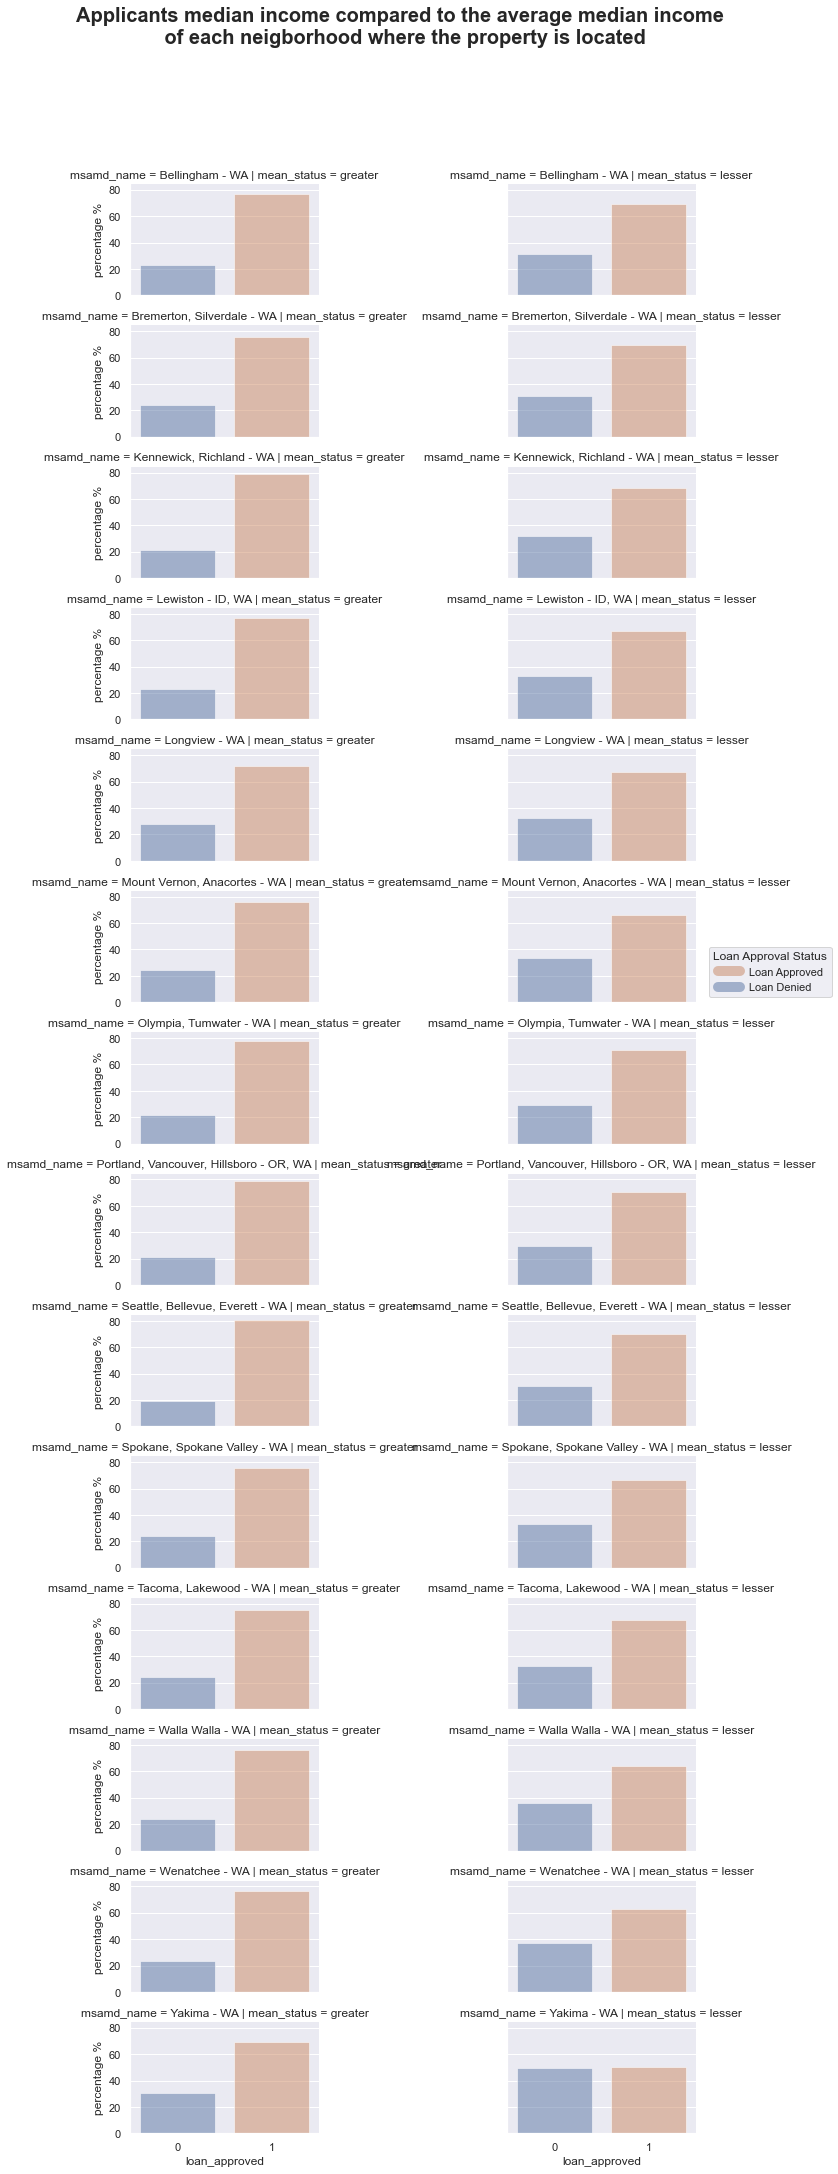

In [22]:
# creating a facetgrid with MSA/MD, Mean Status,loan_approved, percentage %
sns.set(font_scale=1)

# Take a random sample of ten neighborhood
# samp_10_neighborhood = df_grouped.sample(10,random_state = 7)
grid = sns.FacetGrid(df_grouped, row='msamd_name', col='mean_status', height=2.2, aspect=2)
grid.map(sns.barplot, 'loan_approved', 'percentage %', alpha=.5, ci=None,order=[0,1],palette='deep')
grid.add_legend();
grid.tight_layout()

grid.fig.subplots_adjust(top=0.9,wspace=1.0)

grid.fig.suptitle('Applicants median income compared to the average median income \n of each neigborhood where the property is located',
                 fontproperties={'size':20,'weight':'bold'})


axes = plt.gca()

from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm

custom_lines = [Line2D([0], [0], color='#dab9aa', lw=10),
                Line2D([0], [0], color='#a1afca', lw=10)]


axes.legend(custom_lines, ['Loan Approved', 'Loan Denied'],title='Loan Approval Status',
           loc='best', bbox_to_anchor=(0.85, 0.2, 0.9, 10.5));

plt.savefig('neighborhood',bbox_inches='tight')

### Reading plot

* On the x-axis, `0` and `1` means `loan_denied` and `loan_approved` respectively
* Each row is a unique neighborhood
* On each row, read from left towards right

* Lesser status means applicant median income is Lower compared to the average median income of the neighborhood where the property is located.

* Greater status means applicant median income is Above compared to the average median income of the neighborhood where the property is located.



**FINDINGS**

* As you view the greater and lesser mean status graphs on each row, you could see either slight decrease in the number of `loan_denied` or increased in the number of `approved loans` for almost all the plots.

* This implies, applicants with higher median income than the average median income of the neigbhorhood where the property is located, have got their loan approved compared to appplicants with lower median income.



<a id='property'></a>
### 1.0.8) What property type has the highest loan approval rate?

**1-4 family dwelling, multifamily dwelling and manufactured housing are the three property types.**  


**Manufactured homes:** Housing that is essentially ready for occupancy upon leaving the factory and being transported to a building site.
**Multifamily dwelling:** Any housing unit where two (2) or more dwellings are separated by a common wall, floor or ceiling, including but not limited to apartments, condominiums and townhouses.

#### Finding

* Applicants for multifamily dwelling housing property has the highest percentage of qualifying for loans.Such properties can produce cashflow of decent rental income for payment at the earlier stage and that is what most lenders want.
 
* Most applicants of multifamily dwelling are mostly investors and they obviously have good credit-score history and they also provide decent down payment.

* It's tougher to get a loan for manufactured housing. This is because manufactured housing tends to depreciate, while traditional home values tend to increase over time.

In [23]:
# creating a dataframe with `loan_approved` grouped by property_type_name as index
df_cross = pd.crosstab(df_main['property_type_name'],df_main['loan_approved'])

# creating a dictionary of property_type_name and its percentage
perc_dict = {}

for indx in range(df_cross.shape[0]):
#     calculate percentage
    percentage = df_cross.loc[df_cross.index[indx],1]/(df_cross.loc[df_cross.index[indx],0] + df_cross.loc[df_cross.index[indx],1])
    
    perc_dict[df_cross.index[indx]] = np.round(percentage*100,2)


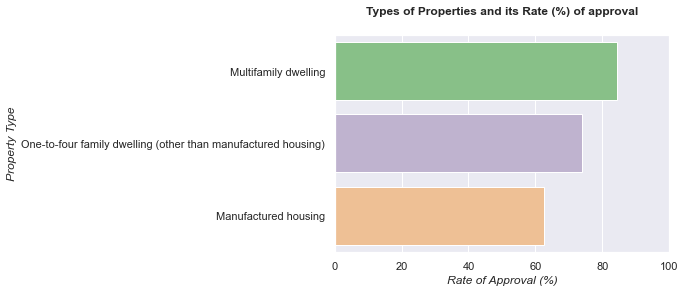

In [24]:
# getting the x and y values for the plot
x = list(perc_dict.keys())
y = list(perc_dict.values())

# creating a barplot of a property type and its rate of approval
sns.barplot(y,x,orient='h',order=sorted(perc_dict,key=lambda x: x[1],reverse=True),palette='Accent');

plt.xlabel('Rate of Approval (%)',fontstyle='italic')
plt.ylabel('Property Type',fontstyle='italic')
plt.xlim([0,100])

# title
plt.title('Types of Properties and its Rate (%) of approval',pad=20,fontweight='bold');
plt.savefig('Property_type',bbox_inches='tight')

### 1.0.9) Which of the loan types has a better chance of being approved?  

There are loans that are insured or guaranteed by government programs offered by:  
    1) Federal Housing Administration (FHA)   
    2) Department of Veterans Affairs (VA)  
    3) Department of Agriculture's Rural Housing Service (RHS) or Farm Service Agency (FSA).  
    All other loans are classified as conventional.
    

In [25]:
# creating a dataframe with loan_type_name and loan_approved
df_main['loan_type_name'].unique()
# a cross table of loan type and loan approval status
df_loan_type = pd.crosstab(df_main['loan_type_name'],df_main['loan_approved'],normalize='index')

In [26]:
# A function to create barplot
def rate_barplot(df,label1=None,label2=None,title=None,x_label=None,y_label=None):
    """This return a barplot with a well labelled axis"""
#     getting the x values from the length of dataframe
    x = np.arange(df.shape[0])
    
#     index of the df as a label
    labels = list(df.index)
    fig  = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    width = 0.35

    ret1 = ax.bar(x-width/2,df[0],width=width,label=label1)
    ret2 = ax.bar(x+width/2,df[1],width=width,label=label2)

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim([0,1])
    ax.set_title(title,fontsize=15,fontweight='bold')
    ax.set_ylabel(y_label,fontstyle='italic')
    ax.set_xlabel(x_label,fontstyle='italic')

    ax.grid(True,which='minor',axis='y')

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}%'.format(np.round(height*100,2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(ret1)
    autolabel(ret2)
#     position the legend outside the main axis
    plt.legend(loc='best', bbox_to_anchor=(0.85, 0.5, 0.5, 0.5))

    plt.setp(ax.get_xticklabels(),rotation=45,ha='right');
    plt.savefig('loan_type_rate',bbox_inches='tight')
    plt.show()

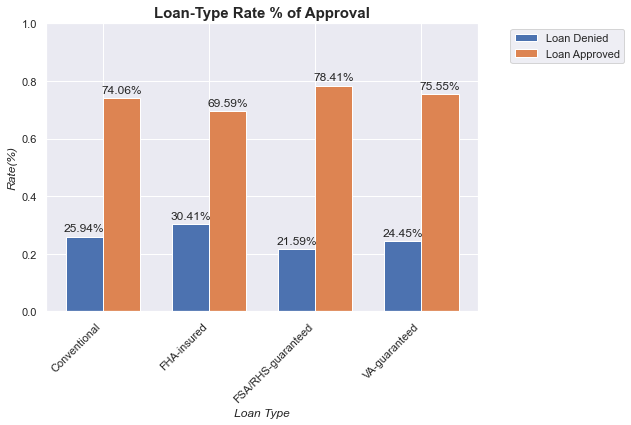

In [27]:
# creating barplot with the `rate_barplot` function
rate_barplot(df_loan_type,'Loan Denied','Loan Approved','Loan-Type Rate % of Approval','Loan Type','Rate(%)')

* From the above graph,FSA/RHS has the highest rate of loan approval whiles FHA stands has the lowest.  
* The FSA/RHS are Agencies set to help low-income rural residence and farmers to get loans. Applicants guaranteed under this agency needs not to worry about credit history or present income since they are pardoned from such criteria but they should be able make payment for their loan,taxes and insurance.  
* FSA takes up to 95% percent of loss.

### 1.1.0) WHICH COUNTY HAS THE HIGHEST NUMBER OF LOAN APPLICANTS AND HIGHEST RATE OF LOAN APPROVAL?

In [29]:
df_main['county_name'].value_counts().head()

King County         107404
Pierce County        45833
Snohomish County     45172
Clark County         28885
Spokane County       21932
Name: county_name, dtype: int64

In [30]:
pd.crosstab(df_main['county_name'],df_main['loan_approved'],normalize='index').sort_values(by=[1],ascending=False).head(5)[1]

county_name
King County         0.762532
Snohomish County    0.758944
Clark County        0.756310
Benton County       0.746893
Thurston County     0.744960
Name: 1, dtype: float64

**King County has the highest number of loan applicants**

* King County according to the 2019 us population and housing census is having a whooping number 2,252,782 residents which makes it the most populous county in Washington and the 13th most populous county in America.

* The second highest is Pierce County, also having a population of 904,980 residents making it the second and 61st most populous county in Washington and United States respectively.

* Atleat this two give a clear indication of how the number of applicants correlate with the population of that county.
* `King County` has the highest rate of loan approval followed by snohomish County.

### 1.1.1) Can the purpose of the loan help you?

Loan applicantions are intended for `Refinancing`, `Home Purchase` and `Home Improvement`.  
Home Purchase and Home Improvement are self explainatory.  

`Refinancing:`Refinancing means getting a new mortgage to replace the original. Refinancing is done to allow a borrower to obtain a better interest term and rate.

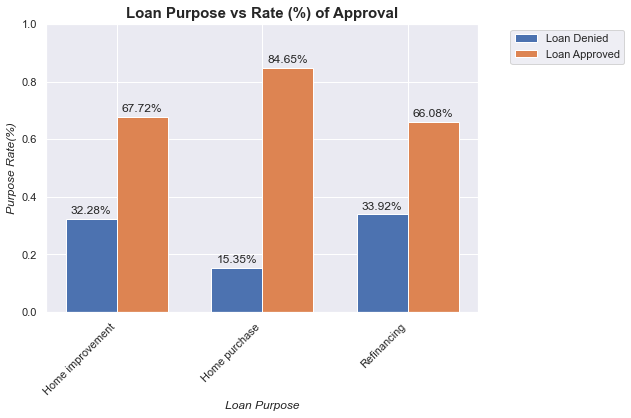

<Figure size 432x288 with 0 Axes>

In [32]:
df_purpose = pd.crosstab(df_main['loan_purpose_name'],df_main['loan_approved'],normalize='index')

rate_barplot(df_purpose,'Loan Denied','Loan Approved','Loan Purpose vs Rate (%) of Approval',
             'Loan Purpose','Purpose Rate(%)')
plt.savefig('loan_purpose',bbox_inches='tight')

* Applying for a loan to purchase a home has a significant rate of approval over the other two.

<a id='hoepa_owner'></a>
### 1.1.2) How does the `owner_occupancy_name` and `hoepa_status_name` affect loan approval?

`HOEPA:` The Home Ownership and Equity Protection Act (HOEPA) was enacted in 1994 as an amendment to the Truth in Lending Act (TILA) to address abusive practices in refinances and closed-end home equity loans with high interest rates or high fees. So `HOEPA_STATUS_NAME` shows whether or not a loan was subjected to heopa regulations.

`Owner_occupancy_name:` This shows the owner-occupancy status of the property. Second homes, vacation homes, and rental properties are classified as "not owner-occupied as a principal dwelling".

For multifamily dwellings (housing five or more families), and any dwellings located outside MSA/MDs, or in MSA/MDs where an institution does not have home or branch offices, an institution may either enter`not applicable`. Most of these properties are for investment purposes.

In [38]:
# grouping the dataframe with three columns being the index and loan_approved values
df_hoepa_grp = pd.crosstab([df_main['owner_occupancy_name'],
             df_main['hoepa_status_name']],df_main['loan_approved'],
            normalize='index').reset_index()

# create loan_approved columns filled with zeros indicating loan denied
df_hoepa_grp['loan_approved'] = 0
df_hoepa_grp_0 = df_hoepa_grp.drop(1,axis=1).rename(columns={0:'percentage'})

# Create loan_approved columns filled with ones indicating loan approved
df_hoepa_grp['loan_approved'] = 1
df_hoepa_grp_1 = df_hoepa_grp.drop(0,axis=1).rename(columns={1:'percentage'})

# combine the dataframes
df_hoepa_grp_combine = pd.concat([df_hoepa_grp_0,df_hoepa_grp_1],axis=0,ignore_index=True,sort=False)


In [39]:
# In order to have a well layed out plot, lets shorten the name the columns and the owner_occupancy_name

df_hoepa_grp_combine.rename(columns={'owner_occupancy_name':'owner_occupy',
                                     'hoepa_status_name':'hoepa_st','percentage':'rate(%)'},inplace=True)

df_hoepa_grp_combine['owner_occupy'] = df_hoepa_grp_combine['owner_occupy'].map({'Not owner-occupied as a principal dwelling':'not_prin_dweller',
                               'Owner-occupied as a principal dwelling':'prin_dweller',
                                 'Not applicable':'not_applic'})


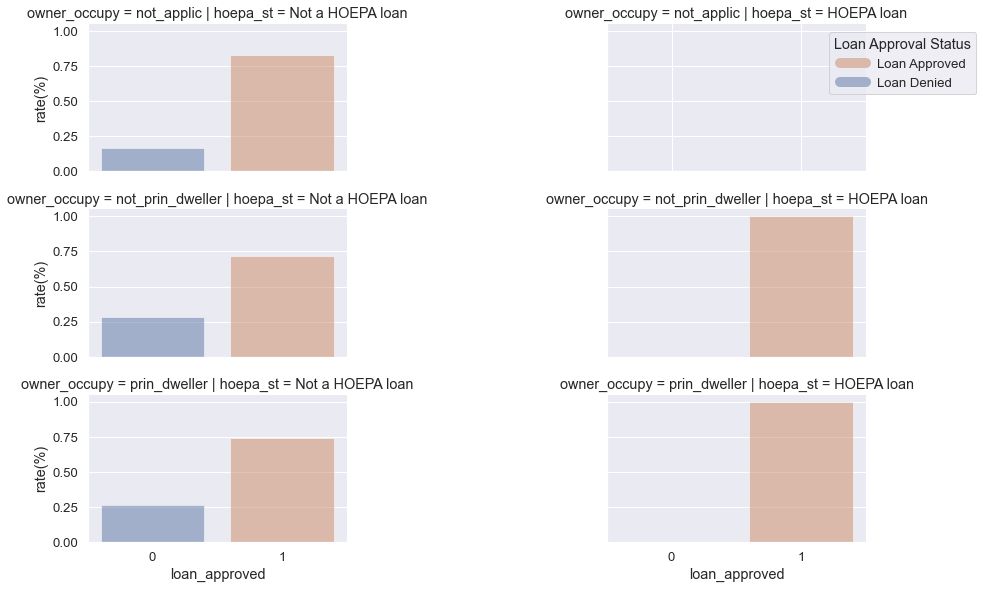

In [41]:
# Plot the graph
sns.set(font_scale=1.2)
grid = sns.FacetGrid(df_hoepa_grp_combine, row='owner_occupy', col='hoepa_st',height=2.95, aspect=2,margin_titles=False)
grid.map(sns.barplot,'loan_approved', 'rate(%)', alpha=.5, ci=None,order=[0,1],palette='deep')
grid.add_legend()
grid.fig.subplots_adjust(top=0.9,wspace=1.0)

axes = plt.gca()

from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm

custom_lines = [Line2D([0], [0], color='#dab9aa', lw=10),
                Line2D([0], [0], color='#a1afca', lw=10)]


axes.legend(custom_lines, ['Loan Approved', 'Loan Denied'],title='Loan Approval Status',
           loc='best', bbox_to_anchor=(0.85, 0.5, 0.6, 3));
plt.savefig('hoepa',bbox_inches='tight')


* None of the loans that were indicated as ` Non_applicable` were subjected to hoepa status
* All the loans subjected to hoepa status stands $100$% rate of approval
* multifamily dwellings (housing five or more families)  that is once indicated as `not_applicable` also have comparatively higher rate of approval.
* The Owner occupied houses have a slight chance over the not_owner occupied homes

### 1.1.3) DOES THE LIEN STATUS PLAY A ROLE IN THE LOAN APPROVAL?

* A lien is a claim or legal right against assets that are typically used as collateral to satisfy a debt.  A lien serves to guarantee an underlying obligation, such as the repayment of a loan.  

* Typical example is a payment agreement for a home loan. The documents includes provisions that allow the lender to keep you from selling the house until you pay what you(debter) owe.
* Let say that an investor is seeking for a loan to buy a real estate with an assessed value of `$`2,000,000
lender(first lien) approved a loan of `$` 1,500,000 the rest of the `$` 500,000 amount was approved by second lender(subordinate lien).

In [42]:
pd.crosstab(df_main['lien_status_name'],df_main['loan_approved'],normalize='index')

loan_approved,0,1
lien_status_name,,
Not secured by a lien,0.451569,0.548431
Secured by a first lien,0.259576,0.740424
Secured by a subordinate lien,0.292347,0.707653


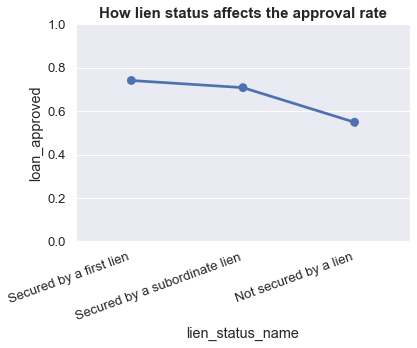

In [43]:
ax = sns.pointplot(x='lien_status_name',y='loan_approved',data=df_main)
plt.setp(ax.get_xticklabels(),rotation=20,ha='right');
plt.ylim([0,1]);
plt.title('How lien status affects the approval rate',fontsize=15,fontweight='bold');


**Results:**
* Loan secured by a `first lien` has the highest rate of approval($74$%). This because loan subjected to this binds the debtor from not being allowed to sell the property untill the full loan repayment is been made. In this case there is relatively lower risk for lenders.  
* Loan secured by a `second lien` has the second highest rate of approval and this is clear because when the debtor defaults and there is a force liquidation of asset, the subordinate lien will only be paid if and only when the first lien( the primary lien's)  money is paid fully. In this case the second lien stands a degree of risk.
* `Not secured by a lien` has the lowest rate of approval ($0.55$%). Remember, the higher the risk of you paying the loan, the lower your chances of getting the loan

# 1.1.4) IS THE LENDING PROCESS DESCRIMINATORY???

### i) We will start by comparing how county with certain percentage of minority and county above or below the overall median county approval rate affects loan approval.

* The United States is the third-most populous country in the world, with an estimated population of 329,227,746 as of January 28, 2020.

* White people constitute the majority of the U.S. population, with a total of about 234,370,202 or 73%."Non-Hispanic Whites" make up 60.7% of the country's population.

* Hispanic,Latino Americans and African/Black-Americans are the minority in USA.


* Properties that are located in the census_tract having a minority population between 13-32%, recorded the highest rate of loan approval for both above and below the overall median approval rate of all counties. Such counties are mixed-racial.

* Applying for a loan to purchase a property located in county that have HIGHER minority population and also below the overall median approval rate of all counties ,have lower rate of loan approval than the LOWER minority populated areas.This can be basically the fact that, people in those counties have low income which makes lenders think that taking loan to invest in those areas may be more riskier so they tend not to approve.

In all the four categories,counties that are below the `median approval rate of all counties` have lower rate of loan approval.

In [44]:
# make a copy of the main. Name the new df as df_county_population
df_county_population = df_main.copy()

# Take out all nan counties
df_county_population = df_county_population[df_county_population['county_name'].notna()]

# make a dataframe of county name as index and loan_approved as values. get the median approval rate for all the counties
med_county_appr_rate = np.round((pd.crosstab(df_county_population['county_name'],
                    df_county_population['loan_approved'],normalize='index')[1]).median(),2)

df_county_rate = pd.crosstab(df_county_population['county_name'],df_county_population['loan_approved'],normalize='index')

# Get names of all counties above the median county approval rate
count_name_above_roa = df_county_rate.loc[df_county_rate[1] >= med_county_appr_rate].index.tolist()

# create 'Aboveall_county_median_appr_rate' column to hold whether the county is above or below the overall median county rate of
# approval. above=1 and below=0
df_county_population['Aboveall_county_median_appr_rate'] = df_county_population['county_name'].isin(count_name_above_roa).astype(int)

# list of all county names
county_name_list = df_county_population['county_name'].unique().tolist()

# county names with its respective average minority population rate
avg_popu_dict = df_county_population.groupby('county_name').mean()['minority_population'].to_dict()

# Fillin the null values in the minority_population with the average minority_population percentage of its particular county
for county_name in county_name_list:
    df_county_population.loc[(df_county_population['county_name'] == county_name) & (df_county_population['minority_population'].isna()),
                         'minority_population'] = avg_popu_dict[county_name]
    
# Break the minority_population into four quantiles
df_county_population['minority_population'] = pd.qcut(df_county_population['minority_population'],4)

In [45]:
# Make a dataframe of loan approval rate
df_county_pop = pd.crosstab([df_county_population['Aboveall_county_median_appr_rate'],
                             df_county_population['minority_population']],df_county_population['loan_approved'],
                            normalize='index').reset_index()

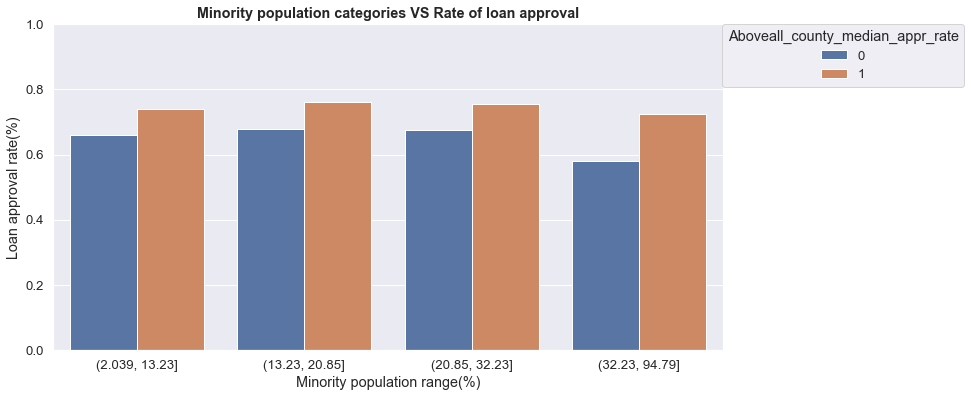

In [46]:
fig,ax = plt.subplots(figsize=(12,6))
sns.barplot(x='minority_population',y=1,data=df_county_pop,hue='Aboveall_county_median_appr_rate')

plt.ylim([0,1])
plt.legend(title='Aboveall_county_median_appr_rate',loc='best', bbox_to_anchor=(0.85, 0.5, 0.52, 0.52))

ax.set_xlabel('Minority population range(%)')
ax.set_ylabel('Loan approval rate(%)')
ax.set_title('Minority population categories VS Rate of loan approval',fontweight='bold');

### ii) Can applicant gender influence his/her loan?
**NB:** Because our main focus is on the two gender status `male` and `female`, we will take all others out of the `applicant_sex_name` column and `co_applicant_sex_name` column.

minority_population,msamd_name,co_applicant_sex_name,co_applicant_race_name_5,co_applicant_race_name_4,co_applicant_race_name_3,co_applicant_race_name_2,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,loan_approved

In [50]:
# Make a copy of the main df into another called df_sex_grouped
df_sex_grouped = df_main.copy()

# Take only male and female sex from both main applicants and co-applicants columns
df_sex_grouped = df_sex_grouped[((df_sex_grouped['applicant_sex_name'] == 'Female') | (df_sex_grouped['applicant_sex_name'] == 'Male')) & ((df_sex_grouped['co_applicant_sex_name'] == 'Female') | (df_sex_grouped['co_applicant_sex_name'] == 'Male'))]

In [52]:
# create a pivot table with the dataframe
df_sex_grouped_pivot = pd.pivot_table(df_sex_grouped,values='loan_approved',index='applicant_sex_name',
                                      columns='co_applicant_sex_name',aggfunc='mean')

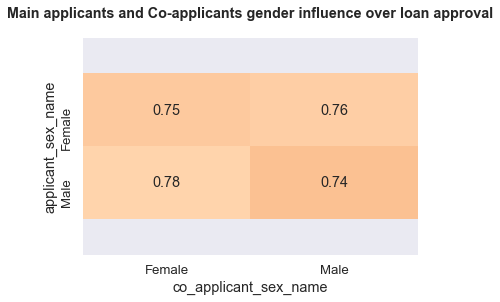

In [53]:
# Plot a heatmap
ax = sns.heatmap(df_sex_grouped_pivot,annot=True,center=0,cbar=False)
# add title to the plot
plt.title('Main applicants and Co-applicants gender influence over loan approval',pad=20,fontweight='bold');
bottom,top = ax.get_ylim()
# add 1/2 each to make the edge full
ax.set_ylim(bottom+0.5,top-0.5);


* It's recorded that, Male main applicants and Female co-applicants have a better chance of qualifying for a loan than all the remaining combination. This makes me think that couples have better chance over single applicants.
This is confirmed in a research article published by forbes. [You can get the details here](https://www.forbes.com/sites/trulia/2016/08/31/how-your-relationship-status-affects-mortgage-worthiness/#27b17b7e6114). 
 * As a single applicant,you have to be earning good income on your own in other to maintain good debt-to-income ratio and nice credit score(which is the main reason applicants loans are denied).
 * Couples can raise this income easily if they join their money, this gives them good debt-to-income ratio and nice credit score to make a hedge over single applicants.
* The heatmap also shows that main and co-applicants of the same-sex have slightly lower chances than the other way round.

### iii) Can applicant loan be denied because of his/her race?
The issue of racism has been a problem in the United States since the foundation of the nation. 
`Not applicable` is the name given to institutions as applicants and co_applicants.


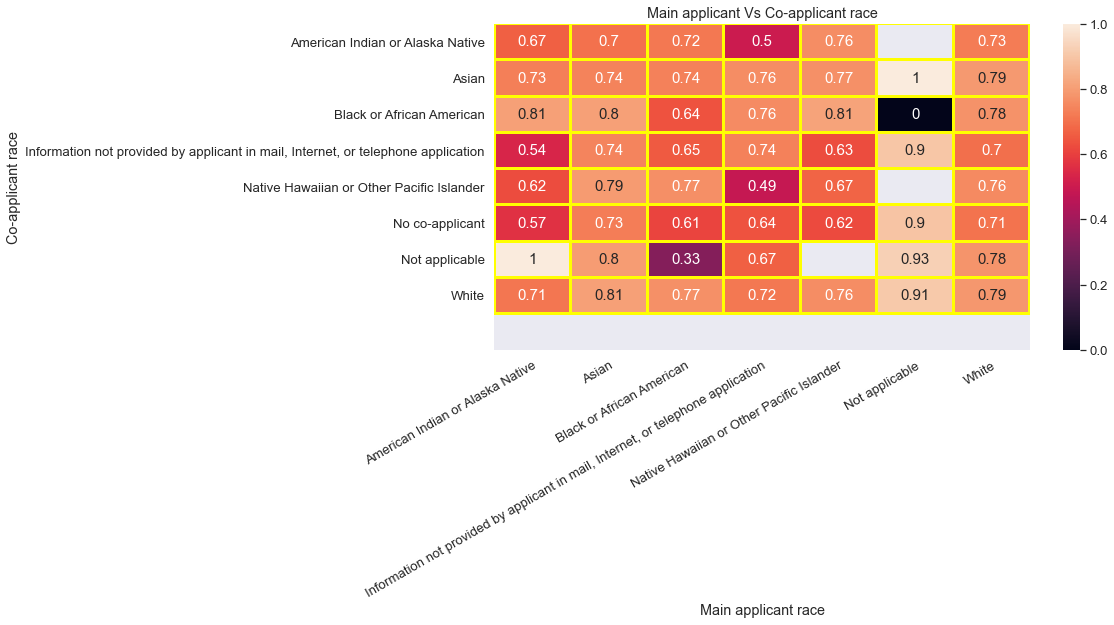

In [54]:
# make a pivot table with various features of the main dataframe.
df_applicants_pivot = pd.pivot_table(df_main,values='loan_approved',
                                     index='co_applicant_race_name_1',
                                     columns='applicant_race_name_1')
# create a figure
fig,ax = plt.subplots(figsize=(12,6))
# draw a heatmap
sns.heatmap(df_applicants_pivot,annot=True,annot_kws={"size": 15},linewidths=2, linecolor='yellow')
# get the bottom and top size of the map
bottom,top = ax.get_ylim()
# add 1/2 each to make the edge full
ax.set_ylim(bottom+0.5,top+0.5)

plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
         rotation_mode="anchor");
plt.title('Main applicant Vs Co-applicant race')
bottom,top = ax.get_ylim()
# add 1/2 each to make the edge full
ax.set_ylim(bottom+0.5,top-0.5);

plt.ylabel('Co-applicant race')
plt.xlabel('Main applicant race');
plt.savefig('race',bbox_inches='tight')
plt.show()




**Table 2**: Each column value is the mean value of co-applicant race(column name) vs all other race. Example.
Assume the co_applicant race is `WHITE` therefore as shown on the heatmap,we compare it with all the main applicants race values then find the average.
Again after doing this calculation,`Black or African American` happens to have the lowest average rate of loan approval $66$% compared to the `white` race(majority) $78$%.

* `Asian americans` a minority group, happens to be having the highest rate of loan approval $76$% and $79$% in both table 1 and 2 respectively.

A research article published by Pew Research Center shows that Blacks and Hispanics face extra challenges in getting home loans than the rest of the race in america.

The reasons lenders cite for turning down mortgage applications show different patterns depending on racial or ethnic group. Among whites, Hispanics and Asians rejected for conventional home loans, for instance, the most frequently cited reason was that their debt-to-income ratio was too high (25%, 26% and 29%, respectively). Among blacks, the most often cited reason was a poor credit history (31%).  
According to the research,Blacks and Hispanics generally put less money down on houses relative to total value than other groups. This makes lenders denied them of loan since it reflect the income status of the applicant and their ability to make repayments.
[click to read more on this interesting findings](https://www.pewresearch.org/fact-tank/2017/01/10/blacks-and-hispanics-face-extra-challenges-in-getting-home-loans/)

* The heatmap shows the rate of loan approval from the various race combination.
A more summarized version is a shown the tables.
We take a particular race of a main or co-applicants and combined it with the approval rate of the rest of the races and find the average.  

In [55]:
column_names = df_applicants_pivot.columns.tolist()
df = pd.DataFrame({column_name:np.round(df_applicants_pivot[column_name].mean(),2) for column_name in column_names},
            index=['All_other_race'])
# set seaborn color map
cm = sns.light_palette("green", as_cmap=True)

def highlight(s):
    return 'background-color: yellow'
# add highlight and caption to the table
df.style.applymap(highlight,subset=['Black or African American','White'])\
    .set_caption('MEAN VALUE OF MAIN APPLICANT RACE NAME VS ALL OTHER RACE')


,American Indian or Alaska Native,Asian,Black or African American,"Information not provided by applicant in mail, Internet, or telephone application",Native Hawaiian or Other Pacific Islander,Not applicable,White
All_other_race,0.710000,0.760000,0.650000,0.660000,0.720000,0.770000,0.750000


**Table 1**: Each column value is the mean value of race(column name) vs all other race. Example.
Assume the main applicant race is `WHITE` therefore as shown on the heatmap,we compare it with all the co-applicants race values then find the average.
after doing this calculation,`Black or African American` happens to have the lowest average rate of loan approval $65$% compared to the `white` race(majority) $75$%.


In [56]:
column_names = df_applicants_pivot.columns.tolist()
df = pd.DataFrame({column_name:np.round(df_applicants_pivot.loc[column_name,:].mean(),2) for column_name in column_names},
            index=['All_other_race'])

cm = sns.light_palette("green", as_cmap=True)

def highlight(s):
    return 'background-color: yellow'

df.style.applymap(highlight,subset=['Black or African American','White'])\
    .set_caption('MEAN OF CO-APPLICANT RACE VS ALL OTHER RACE')
# plt.savefig('table2',bbox_inches='tight')


,American Indian or Alaska Native,Asian,Black or African American,"Information not provided by applicant in mail, Internet, or telephone application",Native Hawaiian or Other Pacific Islander,Not applicable,White
All_other_race,0.680000,0.790000,0.660000,0.700000,0.680000,0.750000,0.780000


**Table 2:**
 Each column value is the mean value of co-applicant race(column name) vs all other race. 
 
**Example**  
Assume the co_applicant race is WHITE therefore as shown on the heatmap, we compare it with all the main applicant's race values then find the average.

Again the results show that Black or African American happens to have the lowest average rate of loan approval $66$% compared to the white race(majority) $78$%.

Asian Americans; a minority group happens to be having the highest rate of loan approval $76$% and $79$% on both table 1 and 2 respectively.

A research article published by Pew Research Center shows that Blacks and Hispanics face extra challenges in getting home loans than the rest of the race in America.

The reasons lenders cite for turning down mortgage applications show different patterns depending on racial or ethnic group. Among whites, Hispanics and Asians rejected conventional home loans, for instance, the most frequently cited reason was that their debt-to-income ratio was too high (25%, 26% and 29%, respectively). Among blacks, the most often cited reason was a poor credit history (31%). 

According to the research, Blacks and Hispanics generally put less money down on houses relative to total value than other groups. This makes lenders denied them of loan since it reflects the income status of the applicant and their ability to make repayments.
Read more on this.

# Conclusion

### After our extensive Exploration we can then conclude everything by giving the following recommendations:

* Credit history and Debt-to-income ratio emerged as the principal factor in securing a loan, hence applicants should maintain a good debt-to-income ratio by decreasing his debt payment each month and also build a good credit history.

* Unfortunately, it turned out that high-income earners have an edge over the lower-income group. So you may consider taking high-income job though it's not a major requirement.

* In choosing the property, make sure your median income is higher than the median neighbourhood income of where the property is located.

* Choose to buy a multifamily dwelling. Don't apply for a loan to buy manufactured housing since that has a very low rate of mortgage approval.

* Apply for FSA/RHS loans. It has a relatively high chance of loan approval over the rest types.

* Consider getting a Home loan in King County.

* Apply for a loan to purchase a house; Home Purchase loan has a significant approval rate.

* If you want 100% rate of approval for your loan, then, apply for HOEPA loans.

* Secure your loan through the first lien.

* Black or African American has a better chance applying with a white American, Asian or native Hawain.